Experimentally create phase diagrams for the simple and the chaotic pendulum, Do a fourier analysis for both the cases, calculate the lyapunov exponent for the systems. Create a computer simulation for the case for the damped driven pendulum and create its bifurcation diagram

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mth
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import pandas as pd
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

## Simple Pendulum

In [5]:
def analyse1(bob_path):
  #t_L, x_L = np.loadtxt(bob_path, delimiter=",", unpack=True, skiprows=2, usecols=(0,1))

  bob_data = pd.read_csv(bob_path, skiprows=2, usecols=[0, 1], header=None, names=['t', 'x'])

  # Extract data from DataFrames
  t= bob_data['t'].values
  x= bob_data['x'].values

  x_norm = normalize(x)


  fft = np.fft.fft(x_norm)
  freq = np.fft.fftfreq(len(x_norm), t[1]-t[0])
  peaks= np.argsort(np.abs(fft))[::-1][:5] #highest 5 peaks
  peak_freqs = freq[peaks]

  peaks,_ = find_peaks(np.abs(fft))

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
  fig.subplots_adjust(wspace=0.15, hspace=0.3)

  axes[0,0].plot(t, x_norm)
  #axes[0,0].set_xlim(0,20)
  axes[0,0].set_xlabel('Time (s)')
  axes[0,0].set_ylabel('Distance (cm)')
  axes[0,0].set_title('Position-Time')

  axes[0,1].plot(t, x_norm)
  axes[0,1].set_xlim(10,50)
  axes[0,1].set_xlabel('Time (s)')
  axes[0,1].set_ylabel('Distance (cm)')
  axes[0,1].set_title('Position-Time')

  axes[1,0].plot(freq, np.abs(fft))
  #axes[1,0].set_xlim(0.5, 1)
  #axes[1,0].set_ylim(0,500)
  axes[1,0].set_xlabel('Frequency (Hz)')
  axes[1,0].set_ylabel('FFT Amplitude')
  axes[1,0].set_title('Fourier Transform')

  axes[1,1].plot(freq, np.abs(fft))
  axes[1,1].scatter(freq[peaks],np.abs(fft)[peaks] , color='g')
  axes[1,1].set_xlim(0.3, 1.3)
  axes[1,1].set_ylim(0,500)
  axes[1,1].set_xlabel('Frequency (Hz)')
  axes[1,1].set_ylabel('FFT Amplitude')
  axes[1,1].set_title('Fourier Transform')

  handles, labels = [], []
  for ax in fig.axes:
      h, l = ax.get_legend_handles_labels()
      handles += h
      labels += l
  fig.legend(handles, labels, loc='lower center')

  plt.show()
  print("Peak frequencies of the mass:", peak_freqs)

In [6]:
def analyse2(bob_path):
  #t_L, x_L = np.loadtxt(bob_path, delimiter=",", unpack=True, skiprows=2, usecols=(0,1))

  bob_data = pd.read_csv(bob_path, skiprows=2, usecols=[0,1,2,5,6], header=None, names=['t', 'x', 'vx', 'px', 'L'])

  # Extract data from DataFrames
  t= bob_data['t'].values
  v= bob_data['vx'].values
  p= bob_data['px'].values
  L= bob_data['L'].values
  x= bob_data['x'].values

  x_norm = normalize(x)

  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(32, 10))
  fig.subplots_adjust(wspace=0.15, hspace=0.5)

  axes[0].plot(t, x_norm)
  #axes[0,0].set_xlim(0,20)
  axes[0].set_xlabel('Time (s)')
  axes[0].set_ylabel('Distance (cm)')
  axes[0].set_title('Position-Time')

  axes[1].plot(t, p)
  axes[1].set_xlabel('Time (s)')
  axes[1].set_ylabel('Momentum')
  axes[1].set_title('Momentum-Time')

  axes[2].plot(t, L)
  axes[2].set_xlabel('Time (s)')
  axes[2].set_ylabel('Angular Momentum')
  axes[2].set_title('Angular Momentum-Time')

  handles, labels = [], []
  for ax in fig.axes:
      h, l = ax.get_legend_handles_labels()
      handles += h
      labels += l
  fig.legend(handles, labels, loc='lower center')

  plt.show()

In [7]:
#Phase Plots
def analyse3(bob_path):
  #t_L, x_L = np.loadtxt(bob_path, delimiter=",", unpack=True, skiprows=2, usecols=(0,1))

  bob_data = pd.read_csv(bob_path, skiprows=2, usecols=[0,1,2,5,6], header=None, names=['t', 'x', 'vx', 'px', 'L'])

  # Extract data from DataFrames
  t= bob_data['t'].values
  v= bob_data['vx'].values
  p= bob_data['px'].values
  L= bob_data['L'].values
  x= bob_data['x'].values

  x_norm = normalize(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.plot(x, p, t)
  ax.set_xlabel('Position (m)')
  ax.set_ylabel('Momentum (kgm/s)')
  ax.set_zlabel('Time (s)')
  ax.set_title('3D Phase Plot')

  plt.show()

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
  fig.subplots_adjust(wspace=0.15, hspace=0.5)
    
  axes[0].plot(x, p)
  axes[0].set_xlabel('Position (m)')
  axes[0].set_ylabel('Momentum (kgm/s)')
  axes[0].set_title('Phase Plot')
    
  axes[1].plot(x[40:80], p[40:80])
  axes[1].set_xlabel('Position (m)')
  axes[1].set_ylabel('Momentum (kgm/s)')
  axes[1].set_title('Phase Plot (first 40 seconds)')
    
  handles, labels = [], []
  for ax in fig.axes:
      h, l = ax.get_legend_handles_labels()
      handles += h
      labels += l
  fig.legend(handles, labels, loc='lower center')

  plt.show()
    
    

In [8]:
def analyse4(bob_path):
  bob_data = pd.read_csv(bob_path, skiprows=2, usecols=[0,1,3,4], header=None, names=['t', 'x',  'theta', 'omega'])

  # Extract data from DataFrames
  t= bob_data['t'].values
  x= bob_data['x'].values
  theta= bob_data['theta'].values
  omega= bob_data['omega'].values

  x_norm = normalize(x)
    
  time = t

  
  X1= theta 
  X2= theta + 0.001 
  X1_0=X1[0] 
  X2_0=X2[0] 
  X_0=abs(X1_0-X2_0) #Initial seperation vector 
  XX=np.array(np.log((abs(X1-X2)/X_0))) 
    #Calculating the absolute log value of seperation vector scaled by initial values
  plt.plot(time, XX, c='brown')
  plt.xlabel('Time (s)')
  plt.ylabel('ln($\Delta$$\\theta$)')
  plt.show()

  lamda = [] #empty array to store lyapunov exponent
  for i in range(len(XX)):
    lamda.append(XX[i]/time[i])
  plt.plot(time, lamda) 
  #plt.xlim(0,200)
  #plt.ylim(-0.5,0.1)
  plt.xlabel('Time (s)')
  plt.ylabel('Lyapunov Exponent ($\lambda$)')
  #plt.legend()
  plt.axhline(0,color='k',linestyle='-')
  plt.show()

### PLOTS

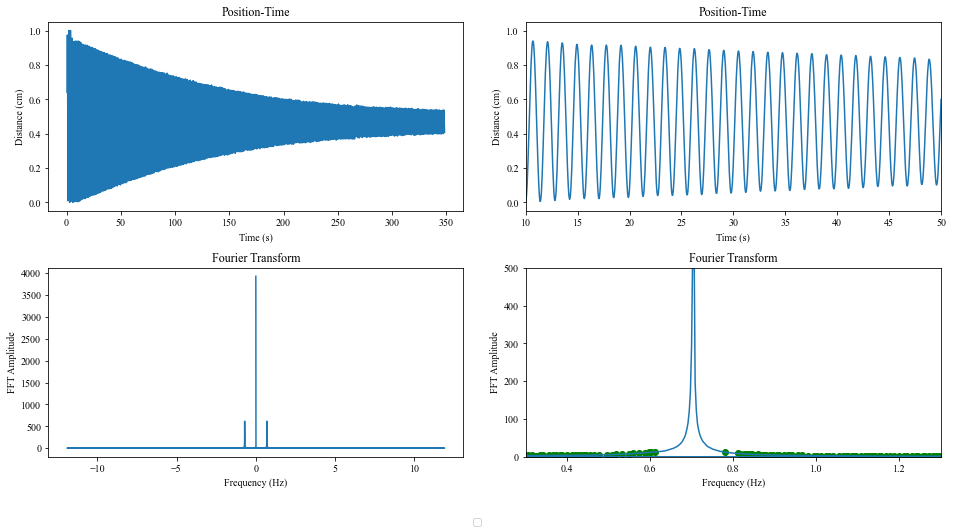

Peak frequencies of the mass: [ 0.          0.70506563 -0.70506563 -0.70221111  0.70221111]


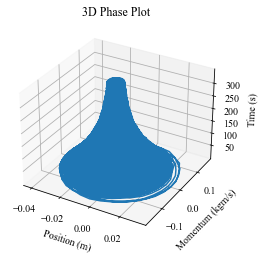

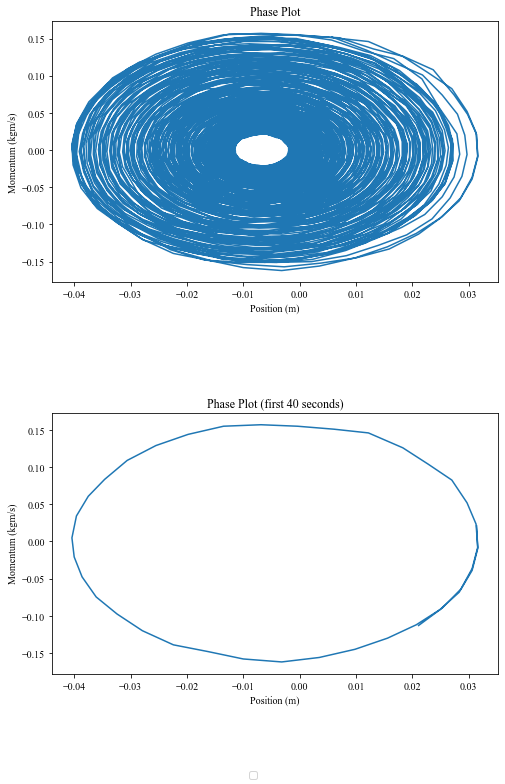

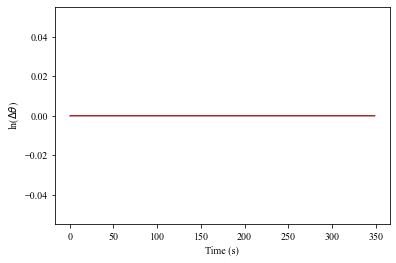

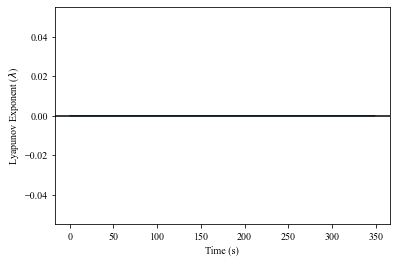

In [9]:
#4 degree amplitude
analyse1('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/4deg.csv')
#analyse2('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/4deg.csv')
analyse3('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/4deg.csv')
analyse4('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/4deg.csv')

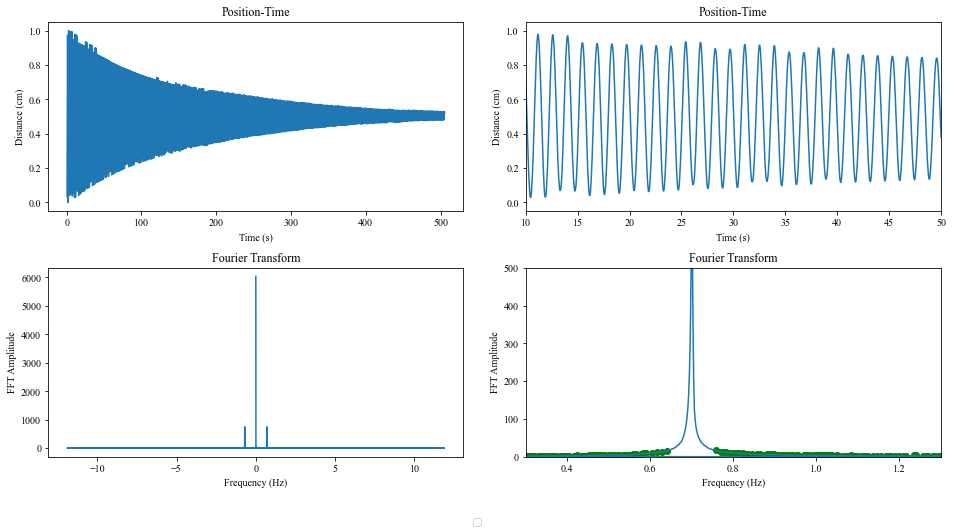

Peak frequencies of the mass: [ 0.          0.70033797 -0.70033797 -0.69837073  0.69837073]


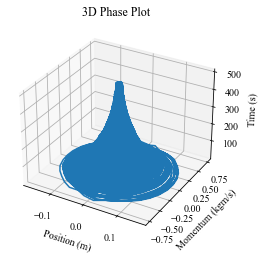

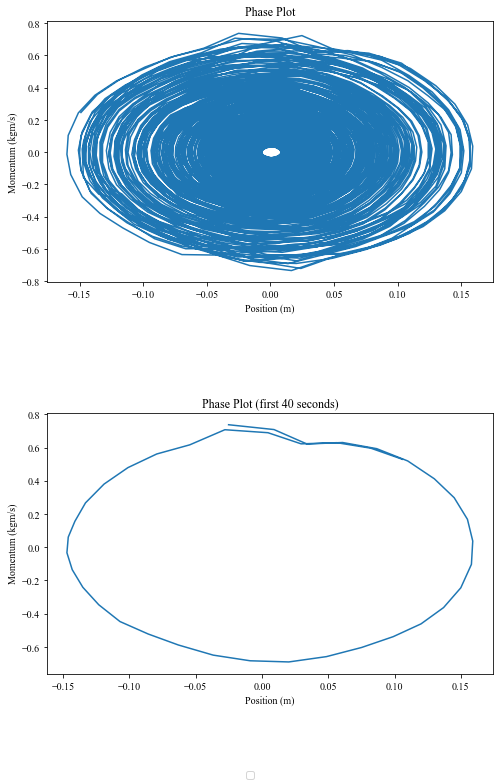

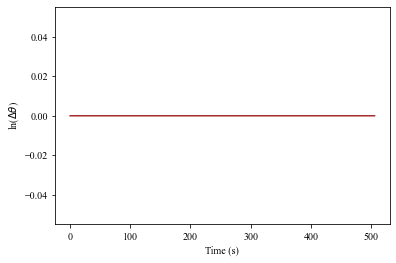

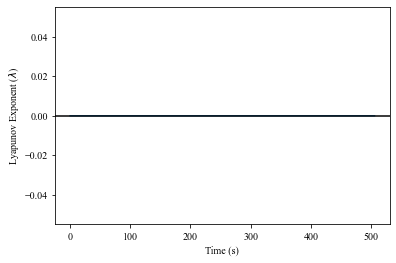

In [10]:
#20 degree amplitude
analyse1('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/20deg.csv')
#analyse2('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/20deg.csv')
analyse3('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/20deg.csv')
analyse4('D:/Semester 4/LAB 3/LAB PROJECT/Simple Pendulum Vids/20deg.csv')

## Magnetic Pendulum

In [11]:
def analyse1c(bob_path_c):
  #t_L, x_L = np.loadtxt(bob_path, delimiter=",", unpack=True, skiprows=2, usecols=(0,1))

  bob_data_c = pd.read_csv(bob_path_c, skiprows=2, usecols=[0,3,6,7,8,9,12,13], header=None, names=['t', 'r', 'v', 'theta', 'omega', 'alpha', 'p', 'L'])

  # Extract data from DataFrames
  t= bob_data_c['t'].values
  r= bob_data_c['r'].values
  v= bob_data_c['v'].values
  theta= bob_data_c['theta'].values
  omega= bob_data_c['omega'].values
  alpha= bob_data_c['alpha'].values
  p= bob_data_c['p'].values
  L= bob_data_c['L'].values

  r_norm = normalize(r)


  fft = np.fft.fft(r_norm)
  freq = np.fft.fftfreq(len(r_norm), t[1]-t[0])
  peaks= np.argsort(np.abs(fft))[::-1][:5] #highest 5 peaks
  peak_freqs = freq[peaks]

  peaks,_ = find_peaks(np.abs(fft))

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
  fig.subplots_adjust(wspace=0.15, hspace=0.3)

  axes[0,0].plot(t, r_norm)
  #axes[0,0].set_xlim(0,20)
  axes[0,0].set_xlabel('Time (s)')
  axes[0,0].set_ylabel('Distance (cm)')
  axes[0,0].set_title('Position-Time')

  axes[0,1].plot(t, r_norm)
  axes[0,1].set_xlim(10,20)
  axes[0,1].set_xlabel('Time (s)')
  axes[0,1].set_ylabel('Distance (cm)')
  axes[0,1].set_title('Position-Time')

  axes[1,0].plot(freq, np.abs(fft))
  #axes[1,0].set_xlim(0.5, 1)
  #axes[1,0].set_ylim(0,500)
  axes[1,0].set_xlabel('Frequency (Hz)')
  axes[1,0].set_ylabel('FFT Amplitude')
  axes[1,0].set_title('Fourier Transform')

  axes[1,1].plot(freq, np.abs(fft))
  axes[1,1].scatter(freq[peaks],np.abs(fft)[peaks] , color='g')
  axes[1,1].set_xlim(0, 5)
  axes[1,1].set_ylim(0,500)
  axes[1,1].set_xlabel('Frequency $\omega$ (Hz)')
  axes[1,1].set_ylabel('FFT Amplitude')
  axes[1,1].set_title('Fourier Transform')

  handles, labels = [], []
  for ax in fig.axes:
      h, l = ax.get_legend_handles_labels()
      handles += h
      labels += l
  fig.legend(handles, labels, loc='lower center')

  plt.show()
  print("Peak frequencies of the mass:", peak_freqs)

In [12]:
def analyse2c(bob_path_c):
  #t_L, x_L = np.loadtxt(bob_path, delimiter=",", unpack=True, skiprows=2, usecols=(0,1))
  bob_data_c = pd.read_csv(bob_path_c, skiprows=2, usecols=[0,3,6,7,8,9,12,13], header=None, names=['t', 'r', 'v', 'theta', 'omega', 'alpha', 'p', 'L'])

  # Extract data from DataFrames
  t= bob_data_c['t'].values
  r= bob_data_c['r'].values
  v= bob_data_c['v'].values
  theta= bob_data_c['theta'].values
  omega= bob_data_c['omega'].values
  alpha= bob_data_c['alpha'].values
  p= bob_data_c['p'].values
  L= bob_data_c['L'].values

  r_norm = normalize(r)

  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(32, 10))
  fig.subplots_adjust(wspace=0.15, hspace=0.5)

  axes[0].plot(t, r_norm)
  #axes[0,0].set_xlim(0,20)
  axes[0].set_xlabel('Time (s)')
  axes[0].set_ylabel('Distance (cm)')
  axes[0].set_title('Position-Time')

  axes[1].plot(t, p)
  axes[1].set_xlabel('Time (s)')
  axes[1].set_ylabel('Momentum')
  axes[1].set_title('Momentum-Time')

  axes[2].plot(t, L)
  axes[2].set_xlabel('Time (s)')
  axes[2].set_ylabel('Angular Momentum')
  axes[2].set_title('Angular Momentum-Time')

  handles, labels = [], []
  for ax in fig.axes:
      h, l = ax.get_legend_handles_labels()
      handles += h
      labels += l
  fig.legend(handles, labels, loc='lower center')

  plt.show()

In [13]:
#Phase Plots
def analyse3c(bob_path_c):
  #t_L, x_L = np.loadtxt(bob_path, delimiter=",", unpack=True, skiprows=2, usecols=(0,1))
  bob_data_c = pd.read_csv(bob_path_c, skiprows=2, usecols=[0,3,6,7,8,9,12,13], header=None, names=['t', 'r', 'v', 'theta', 'omega', 'alpha', 'p', 'L'])

  # Extract data from DataFrames
  t= bob_data_c['t'].values
  r= bob_data_c['r'].values
  v= bob_data_c['v'].values
  theta= bob_data_c['theta'].values
  omega= bob_data_c['omega'].values
  alpha= bob_data_c['alpha'].values
  p= bob_data_c['p'].values
  L= bob_data_c['L'].values

  r_norm = normalize(r)
    

  fig = plt.figure()   
  ax = fig.add_subplot(111)
  ax.plot(theta, omega)
  ax.set_xlabel('Angular Displacement')
  ax.set_ylabel('Angular Frequency')
  ax.set_title('Phase Plot')

  #%matplotlib qt
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
 
  ax.plot(theta, omega, t)
  ax.set_xlabel('Angular Displacement')
  ax.set_ylabel('Angular Frequency')
  ax.set_zlabel('Time (s)')
  ax.set_title('3D Phase Plot')
  plt.show()
    
  handles, labels = [], []
  for ax in fig.axes:
      h, l = ax.get_legend_handles_labels()
      handles += h
      labels += l
  #fig.legend(handles, labels, loc='lower center')

  plt.show()

In [14]:
def analyse4c(bob_path_c):
  bob_data_c = pd.read_csv(bob_path_c, skiprows=2, usecols=[0,7], header=None, names=['t','theta'])

  # Extract data from DataFrames
  t= bob_data_c['t'].values
  theta= bob_data_c['theta'].values
    
  time = t

  
  X1= theta 
  X2= theta + 0.0000001 
  X1_0=X1[0] 
  X2_0=X2[0] 
  X_0=abs(X1_0-X2_0) #Initial seperation vector 
  XX=np.array(np.log((abs(X1-X2)/X_0))) 
    #Calculating the absolute log value of seperation vector scaled by initial values
  plt.plot(time, XX, c='brown')
  plt.xlabel('Time (s)')
  plt.ylabel('ln($\Delta$$\\theta$)')
  plt.show()

  lamda = [] #empty array to store lyapunov exponent
  for i in range(len(XX)):
    lamda.append(XX[i]/time[i])
  plt.plot(time, lamda) 
  #plt.xlim(0,200)
  #plt.ylim(-0.5,0.1)
  plt.xlabel('Time (s)')
  plt.ylabel('Lyapunov Exponent ($\lambda$)')
  #plt.legend()
  plt.axhline(0,color='k',linestyle='-')
  plt.show()

### PLOTS

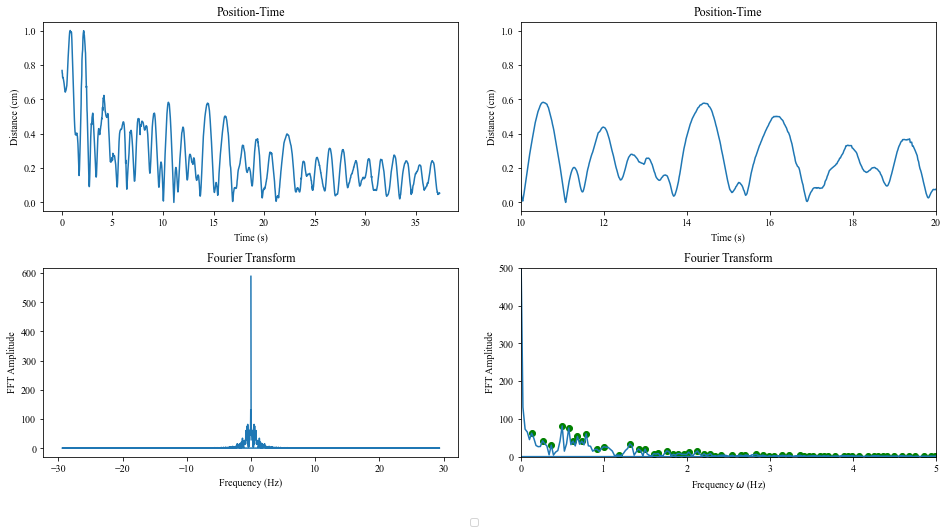

Peak frequencies of the mass: [ 0.         -0.0262605   0.0262605  -0.49894958  0.49894958]


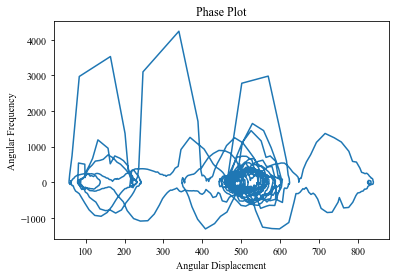

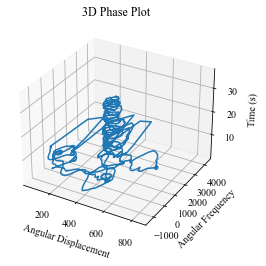

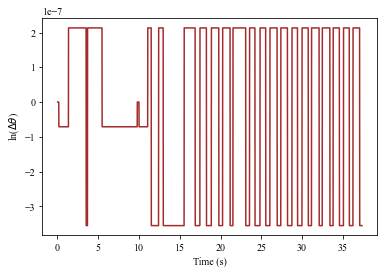

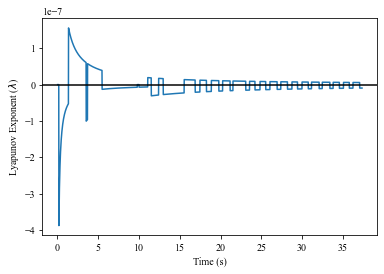

In [15]:
#video 1
analyse1c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag1.csv")
#analyse2c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag1.csv")
analyse3c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag1.csv")
analyse4c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag1.csv")

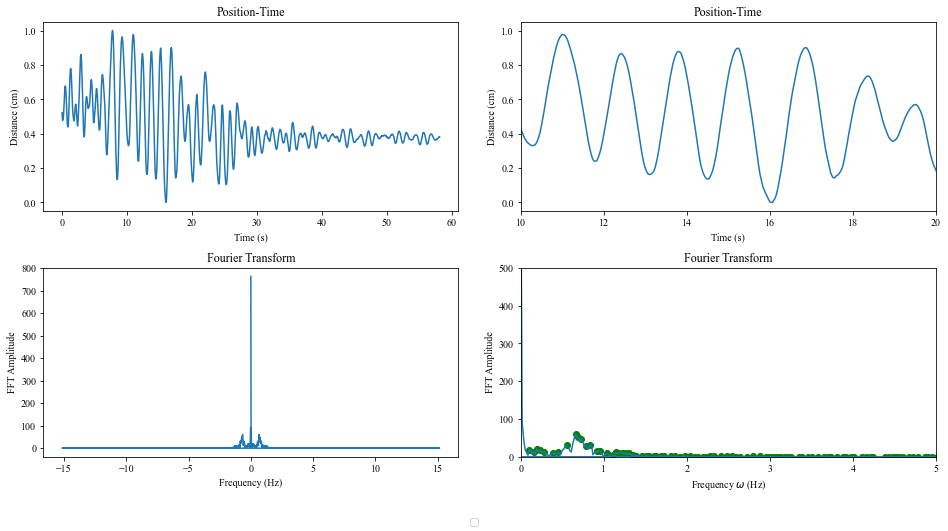

Peak frequencies of the mass: [ 0.         -0.01738556  0.01738556  0.66065126 -0.66065126]


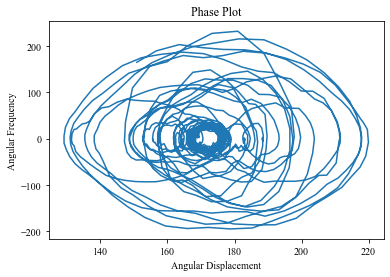

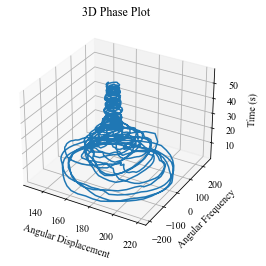

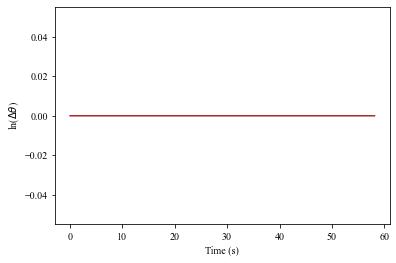

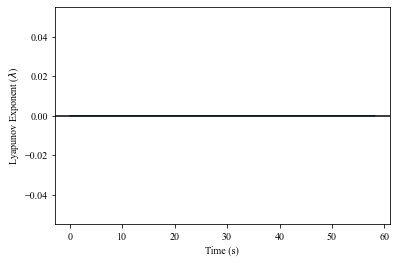

In [16]:
#video 2

analyse1c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag2.csv")
#analyse2c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag2.csv")
analyse3c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag2.csv")
analyse4c("D:\Semester 4\LAB 3\LAB PROJECT\Chaotic Pendulum Vids\mag2.csv")

## DAMPED-DRIVEN PENDULUM

In [3]:
def analyze(gamma_val, F_0_val, omega_d, angle_val=10, color_val='blue', label_val=None, should_return_plot=True):
    g = 9.81  # gravitational acceleration
    l = 1  # length of pendulum
    #omega_d = 5  # driving frequency

    def calculate_motion(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega  # convert second-order ODE to two first-order ODEs
        dvdt = - (g / l) * np.sin(theta) - gamma_val * dxdt + F_0_val * np.cos(omega_d * t)
        return np.array([dxdt, dvdt], dtype=float)

    initial_time = 0.0
    final_time = 100.0
    step_size = 0.01

    time = np.arange(initial_time, final_time, step_size)
    theta_vals = []
    omega_vals = []
    displacement_vals = []  # added to store the displacement values

    theta_0 = (np.pi / 180) * angle_val
    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float)
    for t in time:
        theta_vals.append(r[0])
        omega_vals.append(r[1])
        displacement_vals.append(l*np.sin(r[0]))  # displacement of the pendulum
        k1 = step_size * calculate_motion(r, t)
        k2 = step_size * calculate_motion(r + 0.5 * k1, t + 0.5 * step_size)
        k3 = step_size * calculate_motion(r + 0.5 * k2, t + 0.5 * step_size)
        k4 = step_size * calculate_motion(r + k3, t + step_size)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    if should_return_plot:
        # plot the phase portrait
        plt.scatter(theta_vals[0], omega_vals[0], color=color_val, alpha=0.5)
        if label_val is None:
            label_val = r'$\gamma=$' + str(gamma_val)
        plt.plot(theta_vals, omega_vals, color=color_val, lw=0.8, label=label_val)
        plt.xlabel('Angular displacement')
        plt.ylabel('Angular velocity')
        
        # plot the phase portrait
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(theta_vals[0], omega_vals[0], time[0], color=color_val, alpha=0.5)
        if label_val is None:
            label_val = r'$\gamma=$' + str(gamma_val)
        ax.plot(theta_vals, omega_vals, time, color=color_val, lw=0.8, label=label_val)
        ax.set_xlabel('Angular displacement')
        ax.set_ylabel('Angular velocity')
        ax.set_zlabel('Time')
        
        # plot the displacement-time graph
        plt.figure()  # create a new figure
        plt.plot(time, displacement_vals, color=color_val, lw=0.8, label=label_val)
        plt.xlim(0,20)
        plt.xlabel('Time')
        plt.ylabel('Displacement')
        
        # plot the Fourier Transform of displacement
        plt.figure()
        freq = np.fft.fftfreq(len(displacement_vals), step_size)
        ft = np.fft.fft(np.array(displacement_vals))
        plt.plot(freq, np.abs(ft), color=color_val, lw=0.8, label=label_val)
        plt.xlim(-5, 5)
        plt.xlabel('Frequency')
        plt.ylabel('FFT Amplitude')
        
        peaks= np.argsort(np.abs(ft))[::-1][:5] #highest 5 peaks
        peak_freqs = freq[peaks]
        print("Peak frequencies of the mass:", peak_freqs)

In [4]:
def analyze2(gamma,x_0, color='blue',label=None,return_plot=True): 
    
    w_0=3*np.pi #this is the natural frequency 
    beta=w_0/8 #this is the damping coefficient
    omega_d=2*np.pi 

    def f(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega
        dvdt = - w_0**2*np.sin(theta)-2*beta*dxdt+gamma*w_0**2*np.cos(omega_d*t)

        return np.array([dxdt, dvdt], dtype=float)


    initial_time = 0.0
    final_time = 100.0
    step_size = 0.1 #0.01 takes a lot of time
    time = np.arange(initial_time, final_time, step_size)
    theta_vals = []
    omega_vals = []
    displacement_vals = []  # added to store the displacement values

    theta_0 = x_0
    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float) #rk4 integrator
    for t in time:
        theta_vals.append(r[0])
        omega_vals.append(r[1])
        k1 = step_size * f(r, t)
        k2 = step_size * f(r + 0.5 * k1, t + 0.5 * step_size)
        k3 = step_size * f(r + 0.5 * k2, t + 0.5 * step_size)
        k4 = step_size * f(r + k3, t + step_size)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return (np.array(theta_vals),np.array(omega_vals))

C:\Users\User\AppData\Local\Temp\ipykernel_34544\1231238385.py:37: RuntimeWarning: divide by zero encountered in log
  XXb=np.array(np.log((abs(X1b-X2b)/Xb_0)))


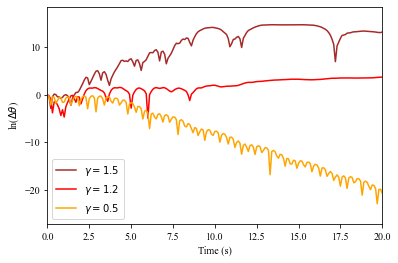

C:\Users\User\AppData\Local\Temp\ipykernel_34544\1231238385.py:49: RuntimeWarning: invalid value encountered in double_scalars
  lamda.append(XX[i]/time[i])
C:\Users\User\AppData\Local\Temp\ipykernel_34544\1231238385.py:59: RuntimeWarning: invalid value encountered in double_scalars
  lamda.append(XXa[i]/time[i])
C:\Users\User\AppData\Local\Temp\ipykernel_34544\1231238385.py:69: RuntimeWarning: invalid value encountered in double_scalars
  lamda.append(XXb[i]/time[i])


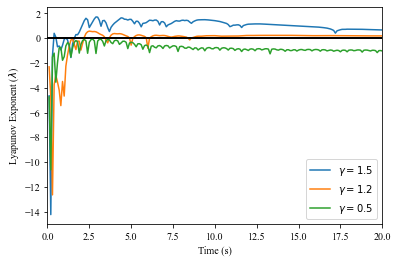

In [5]:
initial_time = 0.0
final_time = 100.0
step_size = 0.1 #0.01 takes a lot of time
time = np.arange(initial_time, final_time, step_size)


X1,_= analyze2(1.5,0) 
X2,_= analyze2(1.5,0.00001) 
X1_0=X1[0] 
X2_0=X2[0] 
X_0=abs(X1_0-X2_0) #Initial seperation vector 
XX=np.array(np.log((abs(X1-X2)/X_0))) 
#Calculating the absolute log value of seperation vector scaled by initial values
plt.plot(time, XX, label='$\gamma = 1.5$', c='brown')
plt.xlim(0,20)
plt.xlabel('Time (s)')
plt.ylabel('ln($\Delta$$\\theta$)')

X1a,_= analyze2(1.2,0) 
X2a,_= analyze2(1,2,0.00001) 
X1a_0=X1a[0] 
X2a_0=X2a[0] 
Xa_0=abs(X1a_0-X2a_0) #Initial seperation vector 
XXa=np.array(np.log((abs(X1a-X2a)/Xa_0))) 
#Calculating the absolute log value of seperation vector scaled by initial values
plt.plot(time, XXa, label='$\gamma = 1.2$', c='red')
plt.xlim(0,20)
plt.xlabel('Time (s)')
plt.ylabel('ln($\Delta$$\\theta$)')


X1b,_= analyze2(0.5,0) 
X2b,_= analyze2(0.5,0.00001) 
X1b_0=X1b[0] 
X2b_0=X2b[0] 
Xb_0=abs(X1b_0-X2b_0) #Initial seperation vector 
XXb=np.array(np.log((abs(X1b-X2b)/Xb_0))) 
#Calculating the absolute log value of seperation vector scaled by initial values
plt.plot(time, XXb, label='$\gamma = 0.5$', c='orange')
plt.xlim(0,20)
plt.xlabel('Time (s)')
plt.ylabel('ln($\Delta$$\\theta$)')

plt.legend()
plt.show()

lamda = [] #empty array to store lyapunov exponent
for i in range(len(XX)):
  lamda.append(XX[i]/time[i])
plt.plot(time, lamda, label='$\gamma = 1.5$') 
plt.xlim(0,20)
#plt.ylim(-0.5,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent ($\lambda$)')
plt.axhline(0,color='k',linestyle='-')

lamda = [] #empty array to store lyapunov exponent
for i in range(len(XXa)):
  lamda.append(XXa[i]/time[i])
plt.plot(time, lamda, label='$\gamma = 1.2$') 
plt.xlim(0,20)
#plt.ylim(-0.5,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent ($\lambda$)')
plt.axhline(0,color='k',linestyle='-')

lamda = [] #empty array to store lyapunov exponent
for i in range(len(XXb)):
  lamda.append(XXb[i]/time[i])
plt.plot(time, lamda, label='$\gamma = 0.5$') 
plt.xlim(0,20)
#plt.ylim(-0.5,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent ($\lambda$)')
plt.axhline(0,color='k',linestyle='-')

plt.legend()
plt.show()

### PLOTS

Peak frequencies of the mass: [ 3.18 -3.18 -3.19  3.19  3.17]


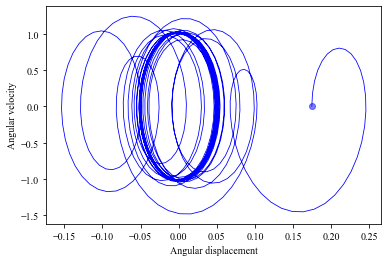

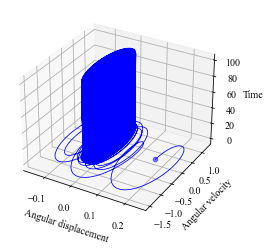

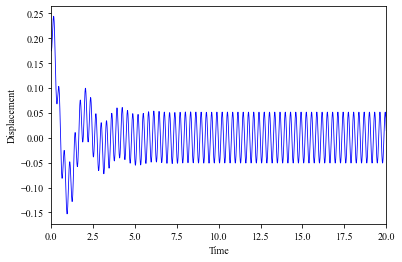

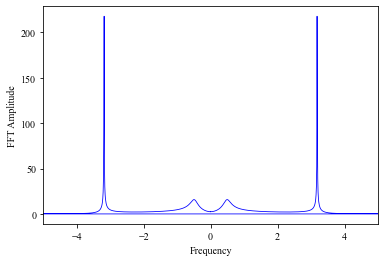

Peak frequencies of the mass: [-3.18  3.18  3.19 -3.19 -3.17]


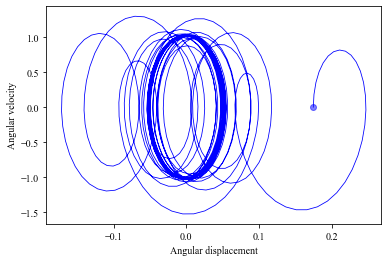

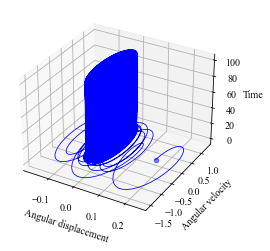

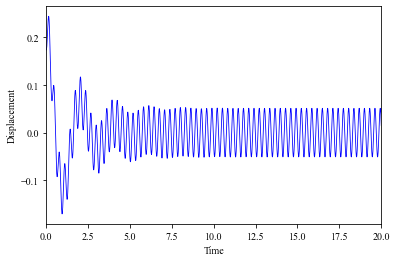

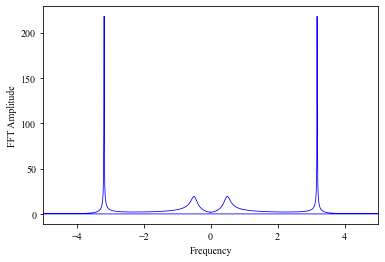

Peak frequencies of the mass: [-3.18  3.18 -3.19  3.19  3.17]


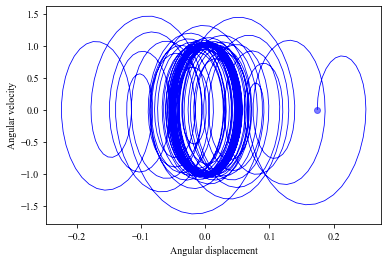

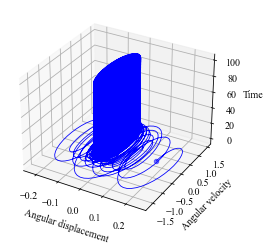

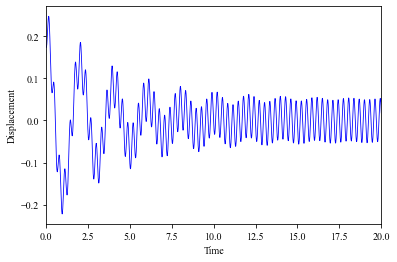

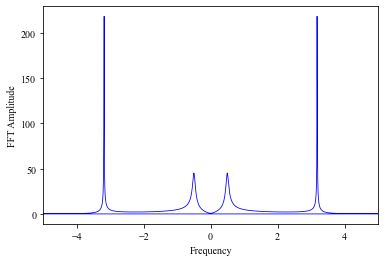

In [168]:
analyze(1.5,20,20) 
plt.show()
analyze(1.2,20,20) 
plt.show()
analyze(0.5,20,20) 
plt.show()

Peak frequencies of the mass: [ 15.92 -15.92  15.91 -15.91   0.  ]


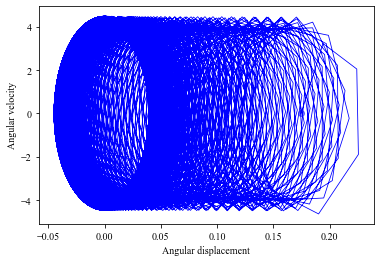

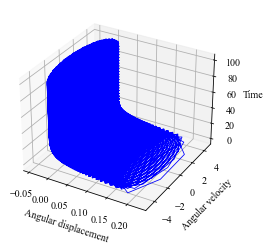

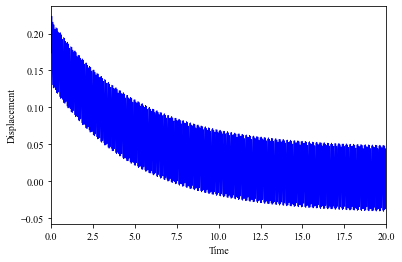

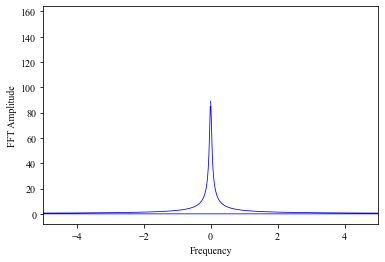

C:\Users\User\AppData\Local\Temp\ipykernel_20052\2692578899.py:14: RuntimeWarning: divide by zero encountered in log
  XXc=np.array(np.log((abs(X1c-X2c)/Xc_0)))


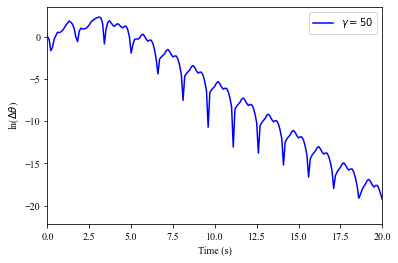

C:\Users\User\AppData\Local\Temp\ipykernel_20052\2692578899.py:26: RuntimeWarning: invalid value encountered in double_scalars
  lamda.append(XXc[i]/time[i])


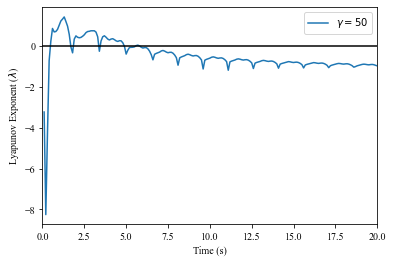

In [170]:
initial_time = 0.0
final_time = 100.0
step_size = 0.1 #0.01 takes a lot of time
time = np.arange(initial_time, final_time, step_size)

analyze(50,500,100)
plt.show()

X1c,_= analyze2(50,0) 
X2c,_= analyze2(50,0.00001) 
X1c_0=X1b[0] 
X2c_0=X2b[0] 
Xc_0=abs(X1c_0-X2c_0) #Initial seperation vector 
XXc=np.array(np.log((abs(X1c-X2c)/Xc_0))) 
#Calculating the absolute log value of seperation vector scaled by initial values
plt.plot(time, XXc, label='$\gamma = 50$', c='blue')
plt.xlim(0,20)
plt.xlabel('Time (s)')
plt.ylabel('ln($\Delta$$\\theta$)')

plt.legend()
plt.show()

lamda = [] #empty array to store lyapunov exponent
for i in range(len(XXc)):
  lamda.append(XXc[i]/time[i])
plt.plot(time, lamda, label='$\gamma = 50$') 
plt.xlim(0,20)
#plt.ylim(-0.5,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent ($\lambda$)')
plt.axhline(0,color='k',linestyle='-')

plt.legend()
plt.show()

## BIFURCATION DIAGRAMS AND POINCARE SECTIONS       

In [6]:
 #Taken from science blog (check citation) to convert the domain of the angle from -inf,inf to -pi,pi
def truncated_remainder(dividend, divisor):
    divided_number = dividend / divisor
    divided_number = \
        -int(-divided_number) if divided_number < 0 else int(divided_number)

    remainder = dividend - divisor * divided_number

    return remainder

In [7]:
#Taken from science blog (check citation) to convert the domain of the angle from -inf,inf to -pi,pi
def transform_to_pipi(input_angle):
    revolutions = int((input_angle + np.sign(input_angle) * np.pi) / (2 * np.pi))

    p1 = truncated_remainder(input_angle + np.sign(input_angle) * np.pi, 2 *np.pi)
    p2 = (np.sign(np.sign(input_angle)
                  + 2 * (np.sign(np.fabs((truncated_remainder(input_angle + np.pi, 2 * np.pi))
                                      / (2 *np.pi))) - 1))) *np.pi

    output_angle = p1 - p2

    return output_angle

In [8]:
def analyse(gamma=1.5,color='black',label=None,return_plot=True): #redefining analyse function for bifurcations
    
    w_0=3*np.pi 
    beta=w_0/8
    omega_d=2*np.pi

    def f(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega
        dvdt = - w_0**2*np.sin(theta)-2*beta*dxdt+gamma*w_0**2*np.cos(omega_d*t)

        return np.array([dxdt, dvdt], dtype=float)


    initial_time = 0.0
    final_time = 10000.0
    step_size = 0.1 #0.01 takes a lot of time
    time = np.arange(initial_time, final_time, step_size)
    theta = []
    omega = []

    theta_0 = 0
    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float)
    for t in time:
        theta.append(transform_to_pipi(r[0]))
        omega.append(r[1])
        k1 = step_size * f(r, t)
        k2 = step_size * f(r + 0.5 * k1, t + 0.5 * step_size)
        k3 = step_size * f(r + 0.5 * k2, t + 0.5 * step_size)
        k4 = step_size * f(r + k3, t + step_size)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    if (return_plot):

        plt.scatter(theta[0],omega[0],color=color,alpha=0.5)
        if (label==None):
            label=r'$\gamma=$'+str(gamma)
        plt.plot(theta, omega, color=color, lw=0.8,label=label)
        
    return (np.array(theta),np.array(omega))

In [8]:
initial_time = 0.0
final_time = 100.0
step_size = 0.1 #0.01 takes a lot of time
time = np.arange(initial_time, final_time, step_size)
F_0=np.linspace(0,1.5,1000) #The values of the parameter as an array to calculate bifurcations (1000 values)
Theta_new=[]

In [ ]:
for i in F_0:
    Theta, _ =analyse(i,return_plot=False) #gives the theta value for a given F_0
    Theta_new=Theta[-500:] #cuts the array only taking last 500 values, assumed to be steady state
    for j in range(len(Theta_new)):
        if j%10==0: #j is a time index ranging from 0.1,0.2... divisibility by 10 gives 1 second 2 second values
            plt.plot(i,Theta_new[j], 'ko',ms=0.5) #plotting bifurcation value for the steady state
            plt.ylim(-np.pi-0.1,np.pi+0.1)
            #plt.xlim(0,1.5)
            plt.xlabel('Forcing parameter ($\gamma$)')
            plt.ylabel('$\Theta$ (Poincare section values)')
#divisibility by 10 occurs because the time period is 2pi/driving=1. Hence, 1 time unit= 1 tau

KeyboardInterrupt: 

In [ ]:
for i in F_0:
    Theta, _ =analyse(i,return_plot=False) #gives the theta value for a given F_0
    Theta_new=Theta[-500:] #cuts the array only taking last 500 values, assumed to be steady state
    for j in range(len(Theta_new)):
        if j%10==0: #j is a time index ranging from 0.1,0.2... divisibility by 10 gives 1 second 2 second values
            plt.plot(i,Theta_new[j], 'ko',ms=0.5) #plotting bifurcation value for the steady state
            plt.ylim(-np.pi-0.1,np.pi+0.1)
            plt.xlim(1.35,1.5)
            plt.xlabel('Forcing parameter ($\gamma$)')
            plt.ylabel('$\Theta$ (Poincare section values)')
#divisibility by 10 occurs because the time period is 2pi/driving=1. Hence, 1 time unit= 1 tau

In [ ]:
x_poincare=[] #empty list to store poincare section values for angle
y_poincare=[] #empty list to store poincare section values for angular velocity
theta,omega=analyse(1.5) #solving for gamma=1.5 which is known for its chaotic behaviour
for j in range(len(theta)):
    if j%10==0: #again dividing by 10 to obtain values of angle and velocity at tau interval. 
        #we are dividing by 10 because h=0.1. Divide by 100 if h=0.01. w_d must be 2pi for this to work
        x_poincare.append(theta[j])
        y_poincare.append(omega[j])

In [ ]:
# The problem with the above poincare angle value is that its domain is from -inf to inf
#this domain for angles needs to be changed to -pi to pi, this conversion can be done by transform function.
XX=[] #blank list for storing transformed values
for i in range(len(x_poincare)):
    XX.append(transform_to_pipi(x_poincare[i])) #transformed values 

In [ ]:
plt.plot(XX,y_poincare,'ko',ms=1) #gives poincare section for gamma=1.5. Shows fractal patterns. 
#change the value of gamma above to get graphs for the non chaotic value of gamma. 
plt.xlim(-3,3)
plt.xlabel('$\Theta_{{poincare}}$')
plt.ylabel('$\omega_{{poincare}}$')
plt.title('$\gamma=1.5$')
plt.show()

In [ ]:
#Zooming in on the tongues to further discuss fractal patterns by 
plt.plot(XX,y_poincare,'ko',ms=0.5)
plt.xlim(1.2,2.08)
plt.ylim(15,25)
plt.xlabel('$\Theta_{{poincare}}$')
plt.ylabel('$\omega_{{poincare}}$')
plt.show()

In [ ]:
#gamma = 0.5 non chaotic behaviour

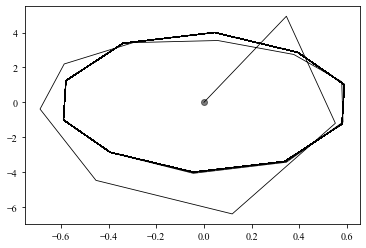

In [131]:
x_poincare=[] #empty list to store poincare section values for angle
y_poincare=[] #empty list to store poincare section values for angular velocity
theta,omega=analyse(0.5) #solving for gamma=1.5 which is known for its chaotic behaviour
for j in range(len(theta)):
    if j%10==0: #again dividing by 10 to obtain values of angle and velocity at tau interval. 
        #we are dividing by 10 because h=0.1. Divide by 100 if h=0.01. w_d must be 2pi for this to work
        x_poincare.append(theta[j])
        y_poincare.append(omega[j])

In [126]:
# The problem with the above poincare angle value is that its domain is from -inf to inf
#this domain for angles needs to be changed to -pi to pi, this conversion can be done by transform function.
XX=[] #blank list for storing transformed values
for i in range(len(x_poincare)):
    XX.append(transform_to_pipi(x_poincare[i])) #transformed values 

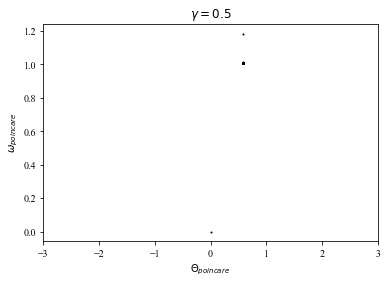

In [128]:
plt.plot(XX,y_poincare,'ko',ms=1) #gives poincare section for gamma=1.5. Shows fractal patterns. 
#change the value of gamma above to get graphs for the non chaotic value of gamma. 
plt.xlim(-3,3)
plt.xlabel('$\Theta_{{poincare}}$')
plt.ylabel('$\omega_{{poincare}}$')
plt.title('$\gamma=0.5$')
plt.show()

extra - seeing what results I get with different combinations of the frequencies and the damping parameter

In [38]:
def analyse(gamma=2,color='black',label=None,return_plot=True): #redefining solve for bifurcations
    
    w_0=2*np.pi 
    beta=w_0/7
    omega_d=w_0

    def f(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega
        dvdt = - w_0**2*np.sin(theta)-2*beta*dxdt+gamma*w_0**2*np.cos(omega_d*t)

        return np.array([dxdt, dvdt], dtype=float)


    initial_time = 0.0
    final_time = 100.0
    step_size = 0.1 #0.01 takes a lot of time
    time = np.arange(initial_time, final_time, step_size)
    theta = []
    omega = []

    theta_0 = 0
    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float)
    for t in time:
        theta.append(transform_to_pipi(r[0]))
        omega.append(r[1])
        k1 = step_size * f(r, t)
        k2 = step_size * f(r + 0.5 * k1, t + 0.5 * step_size)
        k3 = step_size * f(r + 0.5 * k2, t + 0.5 * step_size)
        k4 = step_size * f(r + k3, t + step_size)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    if (return_plot):

        plt.scatter(theta[0],omega[0],color=color,alpha=0.5)
        if (label==None):
            label=r'$\gamma=$'+str(gamma)
        plt.plot(theta, omega, color=color, lw=0.8,label=label)
        
    return (np.array(theta),np.array(omega))

In [39]:
initial_time = 0.0
final_time = 100.0
step_size = 0.1 #0.01 takes a lot of time
time = np.arange(initial_time, final_time, step_size)
F_0=np.linspace(0,5,1000) #The values of the parameter as an array to calculate bifurcations (1000 values)
Theta_new=[]

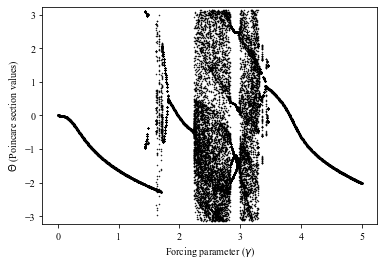

In [40]:
for i in F_0:
    Theta, _ =analyse(i,return_plot=False) #gives the theta value for a given F_0
    Theta_new=Theta[-500:] #cuts the array only taking last 500 values, assumed to be steady state
    for j in range(len(Theta_new)):
        if j%10==0: #j is a time index ranging from 0.1,0.2... divisibility by 10 gives 1 second 2 second values
            plt.plot(i,Theta_new[j], 'ko',ms=0.5) #plotting bifurcation value for the steady state
            plt.ylim(-np.pi-0.1,np.pi+0.1)
            #plt.xlim(0,1.5)
            plt.xlabel('Forcing parameter ($\gamma$)')
            plt.ylabel('$\Theta$ (Poincare section values)')
#divisibility by 10 occurs because the time period is 2pi/driving=1. Hence, 1 time unit= 1 tau

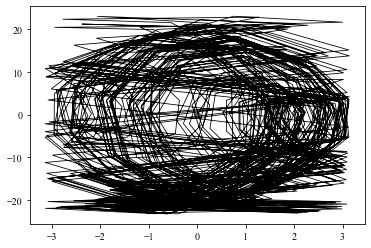

In [46]:
x_poincare=[] #empty list to store poincare section values for angle
y_poincare=[] #empty list to store poincare section values for angular velocity
theta,omega=analyse(2.5) #solving for gamma=1.5 which is known for its chaotic behaviour
for j in range(len(theta)):
    if j%10==0: #again dividing by 10 to obtain values of angle and velocity at tau interval. 
        #we are dividing by 10 because h=0.1. Divide by 100 if h=0.01. w_d must be 2pi for this to work
        x_poincare.append(theta[j])
        y_poincare.append(omega[j])

In [42]:
# The problem with the above poincare angle value is that its domain is from -inf to inf
#this domain for angles needs to be changed to -pi to pi, this conversion can be done by transform function.
XX=[] #blank list for storing transformed values
for i in range(len(x_poincare)):
    XX.append(transform_to_pipi(x_poincare[i])) #transformed values 

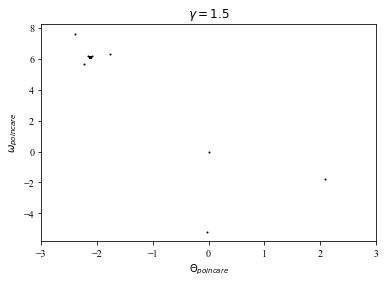

In [43]:
plt.plot(XX,y_poincare,'ko',ms=1) #gives poincare section for gamma=1.5. Shows fractal patterns. 
#change the value of gamma above to get graphs for the non chaotic value of gamma. 
plt.xlim(-3,3)
plt.xlabel('$\Theta_{{poincare}}$')
plt.ylabel('$\omega_{{poincare}}$')
plt.title('$\gamma=1.5$')
plt.show()

$w_0$ is $2\pi$ here for all calculations and the value of the parameter ($\gamma$) is varied only till 2 so that results might be different after that

$\beta = \frac{w_0}{2}$

Same $w_0$ and $w_d$ give no chaos.

$w_d = 2 \times w_0$ also gives no chaos.

$w_d = 1.5 \times w_0$ gives no chaos, period doubling.

$w_0 = 1.5 \times w_d$ gives no chaos, period tripling, then converging.

for different values of $\beta$ same $w_0$ and $w_d$ give chaos

$\beta = \frac{w_0}{8}$ is giving chaos for $w_0 = 1.5 \times w_d$. Nice chaos! BFD.

$w_d = 1.5 \times w_0$ gives no chaos, period doubling.

So now I will try to explore different values of $\beta$ for this combination $w_d = 1.5 \times w_0$.

$\beta = \frac{w_0}{8}$, period doubling, no chaos.

$\frac{w_0}{11}$ gives the same result.

$\frac{w_0}{17.96549379}$ gives the same result.

BUT! IF WE VARY THE PARAMETER TILL 5 WE SEE CHAOS AND FURTHER BIFURCATION, SO THE PREVIOUS RESULTS AREN'T UNIVERSAL

same result obtained for $\frac{w_0}{8}$ and $\frac{w_0}{2}$

Exploring $w_0 = 1.5 \times w_d$ for different values of $\beta$:

$\frac{w_0}{11}$: period tripling, then nice chaos, BFD.

